# Melbourne housing

1. [Data cleaning, Data Exploration, Feature Engineering, Data Transformation, Feature Selection](#dtdesc)
2. [Multivariate Regression với holdout và cross validation, Residue và homoscedasticity](#multi_regression)
3. [Áp dụng PCA rồi Multivariate Regression với holdout và cross validation, Residue và homoscedasticity](#multi_regression_pca)
4. [Tổng kết](#summary)

# <a id="dtdesc">1. Data cleaning, Data Exploration, Feature Engineering, Data Transformation, Feature Selection </a>

In [1]:
#load library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from pandas.plotting import scatter_matrix

%matplotlib inline

# set seed for reproducibility
np.random.seed(0) 

# read in all our data
melbourne_housing = pd.read_csv('Melbourne_housing_FULL.csv')

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
pd.set_option('display.max_columns', None)

In [3]:
#Xem 5 dòng dữ liệu đầu tiên
melbourne_housing.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,2.0,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,3.0,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [4]:
#Xem 5 dòng dữ liệu cuối cùng
melbourne_housing.tail()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
34852,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,24/02/2018,6.3,3013.0,4.0,1.0,3.0,593.0,NaN,NaN,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,24/02/2018,6.3,3013.0,2.0,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,24/02/2018,6.3,3013.0,2.0,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0
34855,Yarraville,12/37 Stephen St,3,h,1140000.0,SP,hockingstuart,24/02/2018,6.3,3013.0,NaN,NaN,NaN,NaN,NaN,NaN,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.0
34856,Yarraville,3 Tarrengower St,2,h,1020000.0,PI,RW,24/02/2018,6.3,3013.0,2.0,1.0,0.0,250.0,103.0,1930.0,Maribyrnong City Council,-37.81810,144.89351,Western Metropolitan,6543.0


In [5]:
#Xem số dòng, số cột của dataframe
melbourne_housing.shape

(34857, 21)

In [6]:
melbourne_housing.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,34857.000000,2.724700e+04,34856.000000,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,13742.00000,15551.000000,26881.000000,26881.000000,34854.000000
mean,3.031012,1.050173e+06,11.184929,3116.062859,3.084647,1.624798,1.728845,593.598993,160.25640,1965.289885,-37.810634,145.001851,7572.888306
std,0.969933,6.414671e+05,6.788892,109.023903,0.980690,0.724212,1.010771,3398.841946,401.26706,37.328178,0.090279,0.120169,4428.090313
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1196.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.350000e+05,6.400000,3051.000000,2.000000,1.000000,1.000000,224.000000,102.00000,1940.000000,-37.862950,144.933500,4385.000000
50%,3.000000,8.700000e+05,10.300000,3103.000000,3.000000,2.000000,2.000000,521.000000,136.00000,1970.000000,-37.807600,145.007800,6763.000000
75%,4.000000,1.295000e+06,14.000000,3156.000000,4.000000,2.000000,2.000000,670.000000,188.00000,2000.000000,-37.754100,145.071900,10412.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.00000,2106.000000,-37.390200,145.526350,21650.000000


In [7]:
# Số lượng điểm data bị thiếu trên mỗi cột
missing_values_count = melbourne_housing.isnull().sum()

# Số lượng điểm data bị thiếu trên mỗi cột của 10 cột đầu
missing_values_count

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

<b>Nhận Xét:</b> Giá nhà bị thiếu 7610 row, vì giá cần dùng để học mô hình nên ko thể thiếu được. Ở đây ta sẽ loại những dòng bị thiếu price

In [8]:
#Lấy tập data với Price khác NaN để train và test
melbourne_housing = melbourne_housing[melbourne_housing['Price'].notnull()]

In [9]:
melbourne_housing.shape

(27247, 21)

In [10]:
# Số lượng điểm data bị thiếu trên mỗi cột
missing_values_count = melbourne_housing.isnull().sum()

# Số lượng điểm data bị thiếu trên mỗi cột của 10 cột đầu
missing_values_count

Suburb               0
Address              0
Rooms                0
Type                 0
Price                0
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          6441
Bathroom          6447
Car               6824
Landsize          9265
BuildingArea     16591
YearBuilt        15163
CouncilArea          3
Lattitude         6254
Longtitude        6254
Regionname           3
Propertycount        3
dtype: int64

# Xử lý missing value

<b>Nhận Xét: </b>Dữ liệu Category thì lấy giá trị xuất hiện nhiều nhất <br/> Numberic thì lấy giá trị trung bình(mean) 

In [11]:
melbourne_housing['Distance'].fillna((melbourne_housing['Distance'].mean()), inplace=True)

In [12]:
melbourne_housing['Postcode'].value_counts().head(1)

3073.0    727
Name: Postcode, dtype: int64

In [13]:
melbourne_housing['Postcode'].fillna(3073, inplace=True)

In [14]:
melbourne_housing['Bedroom2'].fillna((int)(melbourne_housing['Bedroom2'].mean()), inplace=True)

In [15]:
melbourne_housing['Bathroom'].fillna((int)(melbourne_housing['Bathroom'].mean()), inplace=True)

In [16]:
melbourne_housing['Car'].fillna((int)(melbourne_housing['Car'].mean()), inplace=True)

In [17]:
melbourne_housing['Landsize'].fillna(melbourne_housing['Landsize'].mean(), inplace=True)

In [18]:
melbourne_housing['BuildingArea'].fillna(melbourne_housing['BuildingArea'].mean(), inplace=True)

In [19]:
melbourne_housing['YearBuilt'].fillna((int)(melbourne_housing['YearBuilt'].mean()), inplace=True)

In [20]:
melbourne_housing['CouncilArea'].value_counts().head(1)

Boroondara City Council    2520
Name: CouncilArea, dtype: int64

In [21]:
melbourne_housing['CouncilArea'].fillna('Boroondara City Council', inplace=True)

In [22]:
melbourne_housing['Lattitude'].fillna(melbourne_housing['Lattitude'].mean(), inplace=True)

In [23]:
melbourne_housing['Longtitude'].fillna(melbourne_housing['Longtitude'].mean(), inplace=True)

In [24]:
melbourne_housing['Regionname'].value_counts().head(1)

Southern Metropolitan    8524
Name: Regionname, dtype: int64

In [25]:
melbourne_housing['Regionname'].fillna('Southern Metropolitan', inplace=True)

In [26]:
melbourne_housing['Propertycount'].fillna(melbourne_housing['Propertycount'].mean(), inplace=True)

In [27]:
# Số lượng điểm data bị thiếu trên mỗi cột
missing_values_count = melbourne_housing.isnull().sum()

# Số lượng điểm data bị thiếu trên mỗi cột của 10 cột đầu
missing_values_count

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

# Feature Preprocessing and Generation

<b>Nhận Xét: </b>Chọn những feature quan trọng để học

In [28]:
melbourne_housing.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [29]:
feature_columns = ['Suburb', 'Rooms', 'Type', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount']
X = melbourne_housing[feature_columns]
y = melbourne_housing['Price']

In [30]:
X.head()

,Suburb,Rooms,Type,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
1,Abbotsford,2,h,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,156.834586,1966.0,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,2,h,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.000000,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
4,Abbotsford,3,h,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.000000,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0
5,Abbotsford,3,h,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,156.834586,1966.0,Yarra City Council,-37.7969,144.9969,Northern Metropolitan,4019.0
6,Abbotsford,4,h,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.000000,2014.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019.0


<b>Nhận Xét: </b>Label Encoded với Suburb và SellerG do 2 cột category này có quá nhiều value

In [31]:
le = LabelEncoder()

X['Suburb_LabelEncoded'] = le.fit_transform(X.Suburb)
X['SellerG_LabelEncoded'] = le.fit_transform(X.SellerG)
X.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Suburb,Rooms,Type,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Suburb_LabelEncoded,SellerG_LabelEncoded
1,Abbotsford,2,h,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,156.834586,1966.0,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0,0,32
2,Abbotsford,2,h,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.000000,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0,0,32
4,Abbotsford,3,h,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.000000,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0,0,32
5,Abbotsford,3,h,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,156.834586,1966.0,Yarra City Council,-37.7969,144.9969,Northern Metropolitan,4019.0,0,32
6,Abbotsford,4,h,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.000000,2014.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019.0,0,206


In [32]:
X.drop(['SellerG'], axis = 1, inplace = True)
X.drop(['Suburb'], axis = 1, inplace = True)

<b>Nhận Xét: </b>One hot encode các column 'Type', 'Method', 'CouncilArea', 'Regionname'

In [33]:
X = pd.get_dummies(X, columns=['Type', 'Method', 'CouncilArea', 'Regionname']);

In [34]:
X.head()

,Rooms,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount,Suburb_LabelEncoded,SellerG_LabelEncoded,Type_h,Type_t,Type_u,Method_PI,Method_S,Method_SA,Method_SP,Method_VB,CouncilArea_Banyule City Council,CouncilArea_Bayside City Council,CouncilArea_Boroondara City Council,CouncilArea_Brimbank City Council,CouncilArea_Cardinia Shire Council,CouncilArea_Casey City Council,CouncilArea_Darebin City Council,CouncilArea_Frankston City Council,CouncilArea_Glen Eira City Council,CouncilArea_Greater Dandenong City Council,CouncilArea_Hobsons Bay City Council,CouncilArea_Hume City Council,CouncilArea_Kingston City Council,CouncilArea_Knox City Council,CouncilArea_Macedon Ranges Shire Council,CouncilArea_Manningham City Council,CouncilArea_Maribyrnong City Council,CouncilArea_Maroondah City Council,CouncilArea_Melbourne City Council,CouncilArea_Melton City Council,CouncilArea_Mitchell Shire Council,CouncilArea_Monash City Council,CouncilArea_Moonee Valley City Council,CouncilArea_Moorabool Shire Council,CouncilArea_Moreland City Council,CouncilArea_Nillumbik Shire Council,CouncilArea_Port Phillip City Council,CouncilArea_Stonnington City Council,CouncilArea_Whitehorse City Council,CouncilArea_Whittlesea City Council,CouncilArea_Wyndham City Council,CouncilArea_Yarra City Council,CouncilArea_Yarra Ranges Shire Council,Regionname_Eastern Metropolitan,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
1,2,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,156.834586,1966.0,-37.7996,144.9984,4019.0,0,32,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
2,2,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.000000,1900.0,-37.8079,144.9934,4019.0,0,32,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
4,3,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.000000,1900.0,-37.8093,144.9944,4019.0,0,32,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
5,3,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,156.834586,1966.0,-37.7969,144.9969,4019.0,0,32,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
6,4,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.000000,2014.0,-37.8072,144.9941,4019.0,0,206,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0


In [35]:
X.shape

(27247, 64)

In [36]:
X.Date.head()

1    3/12/2016
2    4/02/2016
4    4/03/2017
5    4/03/2017
6    4/06/2016
Name: Date, dtype: object

## Xử lý kiểu date

In [37]:
#Do nhiều kiểu date formats nên dùng infer_datetime_format=True
X['Date'] = pd.to_datetime(X['Date'], infer_datetime_format=True)

<b>Nhận Xét: </b>Tạo mới 1 feature là 'House_Age'<br/>
Date: là ngày bán <br/>
YearBuilt: Năm xây dựng ngôi nhà <br/>
lấy năm của ngày bán trừ cho năm xây dựng ngôi nhà ta được số tuổi của ngôi nhà đó

In [38]:
def get_age_of_house(row):
    data = row.Date
    row['House_Age'] = row.Date.year - row.YearBuilt
    return row
X = X.apply(get_age_of_house, axis=1)

<b>Nhận Xét: </b>Xóa 2 column Date và YearBuilt do đã chuyển qua feature mới

In [39]:
X.drop(['Date'], axis = 1, inplace = True)

In [40]:
X.drop(['YearBuilt'], axis = 1, inplace = True)

In [41]:
X.head()

,Rooms,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Lattitude,Longtitude,Propertycount,Suburb_LabelEncoded,SellerG_LabelEncoded,Type_h,Type_t,Type_u,Method_PI,Method_S,Method_SA,Method_SP,Method_VB,CouncilArea_Banyule City Council,CouncilArea_Bayside City Council,CouncilArea_Boroondara City Council,CouncilArea_Brimbank City Council,CouncilArea_Cardinia Shire Council,CouncilArea_Casey City Council,CouncilArea_Darebin City Council,CouncilArea_Frankston City Council,CouncilArea_Glen Eira City Council,CouncilArea_Greater Dandenong City Council,CouncilArea_Hobsons Bay City Council,CouncilArea_Hume City Council,CouncilArea_Kingston City Council,CouncilArea_Knox City Council,CouncilArea_Macedon Ranges Shire Council,CouncilArea_Manningham City Council,CouncilArea_Maribyrnong City Council,CouncilArea_Maroondah City Council,CouncilArea_Melbourne City Council,CouncilArea_Melton City Council,CouncilArea_Mitchell Shire Council,CouncilArea_Monash City Council,CouncilArea_Moonee Valley City Council,CouncilArea_Moorabool Shire Council,CouncilArea_Moreland City Council,CouncilArea_Nillumbik Shire Council,CouncilArea_Port Phillip City Council,CouncilArea_Stonnington City Council,CouncilArea_Whitehorse City Council,CouncilArea_Whittlesea City Council,CouncilArea_Wyndham City Council,CouncilArea_Yarra City Council,CouncilArea_Yarra Ranges Shire Council,Regionname_Eastern Metropolitan,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria,House_Age
1,2,2.5,3067.0,2.0,1.0,1.0,202.0,156.834586,-37.7996,144.9984,4019.0,0,32,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,50.0
2,2,2.5,3067.0,2.0,1.0,0.0,156.0,79.000000,-37.8079,144.9934,4019.0,0,32,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,116.0
4,3,2.5,3067.0,3.0,2.0,0.0,134.0,150.000000,-37.8093,144.9944,4019.0,0,32,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,117.0
5,3,2.5,3067.0,3.0,2.0,1.0,94.0,156.834586,-37.7969,144.9969,4019.0,0,32,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,51.0
6,4,2.5,3067.0,3.0,1.0,2.0,120.0,142.000000,-37.8072,144.9941,4019.0,0,206,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,2.0


## Xử lý kiểu Numberic, đưa về cùng 1 scale  (mean=0, std=1)

In [42]:
X['Rooms'] = (X['Rooms'] - X['Rooms'].mean())/X['Rooms'].std()
X['Distance'] = (X['Distance'] - X['Distance'].mean())/X['Distance'].std()
X['Postcode'] = (X['Postcode'] - X['Postcode'].mean())/X['Postcode'].std()
X['Bedroom2'] = (X['Bedroom2'] - X['Bedroom2'].mean())/X['Bedroom2'].std()
X['Bathroom'] = (X['Bathroom'] - X['Bathroom'].mean())/X['Bathroom'].std()
X['Car'] = (X['Car'] - X['Car'].mean())/X['Car'].std()
X['Landsize'] = (X['Landsize'] - X['Landsize'].mean())/X['Landsize'].std()
X['BuildingArea'] = (X['BuildingArea'] - X['BuildingArea'].mean())/X['BuildingArea'].std()
X['Lattitude'] = (X['Lattitude'] - X['Lattitude'].mean())/X['Lattitude'].std()
X['Longtitude'] = (X['Longtitude'] - X['Longtitude'].mean())/X['Longtitude'].std()
X['Propertycount'] = (X['Propertycount'] - X['Propertycount'].mean())/X['Propertycount'].std()
X['House_Age'] = (X['House_Age'] - X['House_Age'].mean())/X['House_Age'].std()

In [43]:
X.head()

,Rooms,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Lattitude,Longtitude,Propertycount,Suburb_LabelEncoded,SellerG_LabelEncoded,Type_h,Type_t,Type_u,Method_PI,Method_S,Method_SA,Method_SP,Method_VB,CouncilArea_Banyule City Council,CouncilArea_Bayside City Council,CouncilArea_Boroondara City Council,CouncilArea_Brimbank City Council,CouncilArea_Cardinia Shire Council,CouncilArea_Casey City Council,CouncilArea_Darebin City Council,CouncilArea_Frankston City Council,CouncilArea_Glen Eira City Council,CouncilArea_Greater Dandenong City Council,CouncilArea_Hobsons Bay City Council,CouncilArea_Hume City Council,CouncilArea_Kingston City Council,CouncilArea_Knox City Council,CouncilArea_Macedon Ranges Shire Council,CouncilArea_Manningham City Council,CouncilArea_Maribyrnong City Council,CouncilArea_Maroondah City Council,CouncilArea_Melbourne City Council,CouncilArea_Melton City Council,CouncilArea_Mitchell Shire Council,CouncilArea_Monash City Council,CouncilArea_Moonee Valley City Council,CouncilArea_Moorabool Shire Council,CouncilArea_Moreland City Council,CouncilArea_Nillumbik Shire Council,CouncilArea_Port Phillip City Council,CouncilArea_Stonnington City Council,CouncilArea_Whitehorse City Council,CouncilArea_Whittlesea City Council,CouncilArea_Wyndham City Council,CouncilArea_Yarra City Council,CouncilArea_Yarra Ranges Shire Council,Regionname_Eastern Metropolitan,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria,House_Age
1,-1.039273,-1.293625,-0.42105,-1.240102,-0.682308,-0.586107,-0.128260,1.864612e-13,0.091557,0.015945,-0.789776,0,32,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,-0.023275
2,-1.039273,-1.293625,-0.42105,-1.240102,-0.682308,-1.679171,-0.143331,-2.770674e-01,-0.011651,-0.031257,-0.789776,0,32,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,2.676090
4,0.008072,-1.293625,-0.42105,-0.042291,0.828283,-1.679171,-0.150538,-2.432904e-02,-0.029060,-0.021817,-0.789776,0,32,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,2.716989
5,0.008072,-1.293625,-0.42105,-0.042291,0.828283,-0.586107,-0.163643,1.864612e-13,0.125131,0.001784,-0.789776,0,32,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0.017624
6,1.055417,-1.293625,-0.42105,-0.042291,-0.682308,0.506957,-0.155125,-5.280661e-02,-0.002947,-0.024649,-0.789776,0,206,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,-1.986450


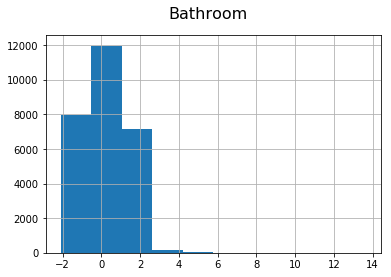

In [44]:
X.Rooms.hist()
plt.suptitle("Bathroom", fontsize=16)
plt.show()

<b>Nhận Xét: </b>Ta thấy column Bathroom có phân phối chuẩn

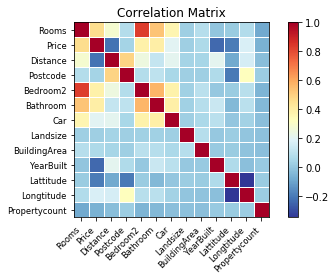

In [45]:
corr = melbourne_housing.corr()
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()

<b>Nhận Xét:</b> Ta thấy nhiều biến có độ tương quan cao (mức trên 0.6)> ví dụ như Bedroom2 và Rooms, Distance và Postcode, ...

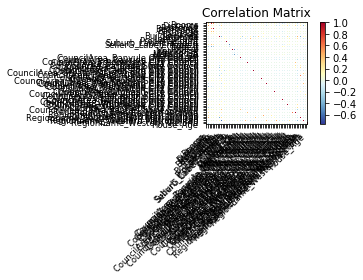

In [46]:
plt.figure(figsize=(10, 10))
corr = X.corr()
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()

Text(0.5,0.98,'Pair Plot')

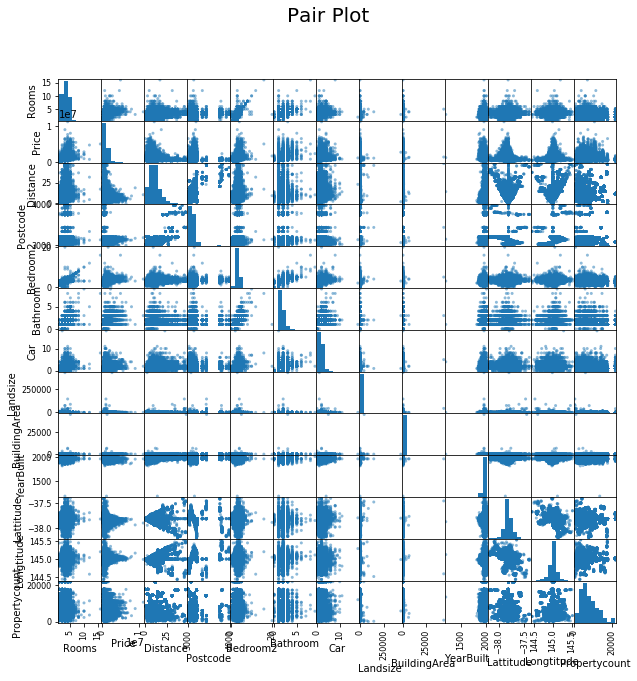

In [47]:
scatter_matrix(melbourne_housing, figsize=(10, 10))
# use suptitle to add title to all sublots
plt.suptitle("Pair Plot", fontsize=20)

# <a id="multi_regression">2. Multivariate Regression với holdout và cross validation, Residue và homoscedasticity </a>

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [49]:
X_train.shape

(21797, 63)

In [50]:
X_test.shape

(5450, 63)

In [51]:
model = linear_model.LinearRegression()

In [52]:
model.fit(X_train.values.reshape(X_train.shape[0], X_train.shape[1]), y_train.values)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [53]:
model.coef_

array([ 2.16867044e+05, -2.53997723e+05,  3.09253447e+04, -1.45899662e+04,
        9.47587415e+04,  2.50122636e+04,  1.10098260e+04,  9.37264071e+03,
       -3.30285974e+04, -1.34358901e+04,  4.85233923e+03, -1.04193637e+02,
       -8.39491066e+01,  2.17583998e+05, -4.22983107e+03, -2.13354167e+05,
       -3.32562188e+04,  3.64584496e+04,  1.59091960e+03,  4.12635605e+03,
       -8.91950638e+03, -1.32973766e+05,  4.84582272e+05,  4.59767037e+05,
       -3.71904461e+05,  1.52477884e+05, -9.67530004e+04, -6.11398635e+04,
        2.55275731e+05,  1.19009870e+05, -1.95733943e+04, -1.78364856e+05,
       -2.08674999e+05,  1.08041769e+05, -1.16366192e+05,  4.02537127e+05,
       -1.62353998e+03, -3.08684381e+05,  1.15372891e+04,  7.01047455e+04,
       -3.75189126e+05,  1.44255117e+05,  7.15551782e+04, -1.19843371e+05,
       -7.42174941e+02, -1.14627521e+05, -2.54087872e+05,  1.50910103e+05,
        4.60924045e+05,  2.82250367e+04, -1.55503810e+05, -4.75721201e+05,
        2.75536324e+04,  

In [54]:
model.intercept_

1034286.2552249723

In [55]:
predict = model.predict(X_test.values.reshape(X_test.shape[0], X_test.shape[1]))

In [56]:
mean_squared_error(y_test, predict)

174128978035.29727

No handles with labels found to put in legend.


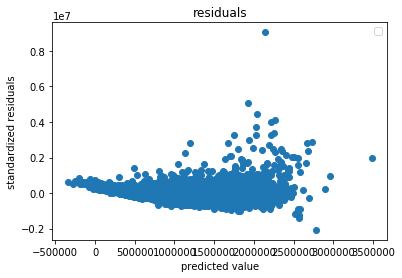

In [57]:
residual = y_test.values.reshape(y_test.shape[0], 1) - predict.reshape(predict.shape[0], 1)

plt.figure()
plt.scatter(predict, residual)
# add a label to the x axis
plt.xlabel('predicted value')
# add a label to the y axis
plt.ylabel('standardized residuals')
# add a title
plt.title('residuals')
# add a legend (uses the labels from plt.scatter)
plt.legend()

<b>Nhận Xét:</b> Các điểm lân cận đường thẳng y = 0. Qua đường thẳng ta thấy model học với lỗi khá nhiều.

# <a id="multi_regression_pca">3. Áp dụng PCA rồi Multivariate Regression với holdout và cross validation, Residue và homoscedasticity </a>

In [58]:
def tuneLinearRegressionModelWithPCA(Xf, yf, num_of_components):
    mse_min = None
    model_best = None
    num_of_components_best = None
    
    for num in num_of_components:
        pca = PCA(n_components=num)
        principalComponents = pca.fit_transform(Xf)
        
        name_components = []
        for i in range(num):
            name_components.append('principal component ' + str(i + 1))
            
        principalDf = pd.DataFrame(data = principalComponents, columns = name_components)
        X_train, X_test, y_train, y_test = train_test_split(principalDf, yf, test_size=0.2)
        
        model = linear_model.LinearRegression()
        
        model.fit(X_train.values.reshape(X_train.shape[0], X_train.shape[1]), y_train.values)
        
        predict = model.predict(X_test.values.reshape(X_test.shape[0], X_test.shape[1]))
        
        mse = mean_squared_error(y_test, predict)
        print('mse ' + str(num) + ': ' + str(mse))
        
        if(mse_min == None or mse_min > mse):
            mse_min = mse
            model_best = model
            num_of_components_best = num
            cache = {"X_train": X_train,
                  "X_test": X_test,
                  "y_train": y_train,
                  "y_test": y_test}
            
    print('Min: ' + str(mse_min))
    print('num_of_components_best: ' + str(num_of_components_best))
    return model_best, cache

In [59]:
model_bestest, cache = tuneLinearRegressionModelWithPCA(X, y, [2, 3, 5, 7, 9, 15, 30, 35, 40, 50, 55])

mse 2: 412573763786.13196
mse 3: 351126536743.1809
mse 5: 226779517829.07187
mse 7: 218822048047.05554
mse 9: 256527168330.14615
mse 15: 207983869537.0711
mse 30: 160831279465.181
mse 35: 201841636924.52496
mse 40: 291467394581.8005
mse 50: 153414856963.26205
mse 55: 141586420479.5208
Min: 141586420479.5208
num_of_components_best: 55


In [60]:
#model_bestest, cache

X_train = cache['X_train']
X_test = cache['X_test']
y_train = cache['y_train']
y_test = cache['y_test']

predict = model_bestest.predict(X_test.values.reshape(X_test.shape[0], X_test.shape[1]))
residual = y_test.values.reshape(y_test.shape[0], 1) - predict.reshape(predict.shape[0], 1)

In [62]:
mean_squared_error(y_test, predict)

141586420479.5208

No handles with labels found to put in legend.


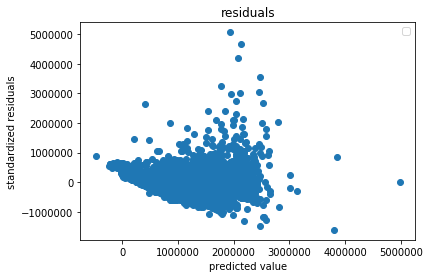

In [61]:
plt.figure()
plt.scatter(predict, residual)
# add a label to the x axis
plt.xlabel('predicted value')
# add a label to the y axis
plt.ylabel('standardized residuals')
# add a title
plt.title('residuals')
# add a legend (uses the labels from plt.scatter)
plt.legend()

<b>Nhận Xét:</b> Các điểm lân cận đường thẳng y = 0. Qua đường thẳng ta thấy model học với lỗi khá nhiều nhưng đỡ hơn so với ko dùng PCA

# <a id="summary">4. Tổng kết </a>

Notebook về Multivariate Regression không dùng và dùng PCA. Ta thấy khi dùng với PCA thì lỗi trên model ít hơn so với không dùng PCA